In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assign values to the function's variables
omega = 1
D = 10
beta = np.sqrt(1 / (2 * D))
L = 40
x = np.linspace(-L/2, L/2, 2000)
dx = L / 2000
x0 = 0

In [3]:
# Define harmonic potential and anharmonic potential
def harmonic_potential(x, omega):
    return 0.5 * omega**2 * x**2

def anharmonic_potential(x, D, beta, x0):
    return D * (1 - np.exp(-beta * (x - x0)))**2

In [4]:
# Construct the potential matrix for the harmonic and anharmonic potentials by np.diag
harmonic_matrix = np.diag(harmonic_potential(x, omega))
anharmonic_matrix = np.diag(anharmonic_potential(x, D, beta, x0))


In [5]:
# Construct the Laplacian matrix
Laplacian =((-2 * np.eye(2000) + np.eye(2000, k=1)) + np.eye(2000, k=-1))/ dx**2

In [6]:
# Construct the Hamiltonian Matrix
def Hamiltonian_Matrix(V, Laplacian):
    return -0.5 * Laplacian + V

Hamilton_harmonic = Hamiltonian_Matrix(harmonic_matrix, Laplacian)
Hamilton_anharmonic = Hamiltonian_Matrix(anharmonic_matrix, Laplacian)


In [7]:
# Using np.linalg.eig to compute the eigenvalues and eigenfunctions of the Hamiltonian for the harmonic and anharmonic potentials
Eigenvalues_harmonic, Eigenfunctions_harmonic = np.linalg.eig(Hamilton_harmonic)
Eigenvalues_anharmonic, Eigenfunctions_anharmonic = np.linalg.eig(Hamilton_anharmonic)

print("The eigenfunction of the Hamiltonian for the harmonic potential:")
print(Eigenfunctions_harmonic)

print("The eigenfunction of the Hamiltonian for the anharmonic potential:")
print(Eigenfunctions_anharmonic)

The eigenfunction of the Hamiltonian for the harmonic potential:
[[-1.76791489e-002  1.75086611e-002  1.73665128e-002 ... -1.20714718e-002
  -7.04130238e-003  1.11326119e-002]
 [ 3.51721949e-002 -3.46932633e-002 -3.42996498e-002 ... -2.28015351e-002
  -1.39175346e-002  2.12698825e-002]
 [-5.23062493e-002  5.12468475e-002  5.03878259e-002 ... -3.09905451e-002
  -2.04630427e-002  2.94986554e-002]
 ...
 [ 1.45743433e-147  1.54771228e-138 -2.61207350e-131 ...  3.09905451e-002
   2.04630427e-002 -2.94986554e-002]
 [-9.46082136e-148 -1.00468537e-138  1.69560716e-131 ...  2.28015351e-002
   1.39175346e-002 -2.12698825e-002]
 [ 4.65498658e-148  4.94333074e-139 -8.34285763e-132 ...  1.20714718e-002
   7.04130238e-003 -1.11326119e-002]]
The eigenfunction of the Hamiltonian for the anharmonic potential:
[[-6.29271180e-001 -5.28918000e-001  4.25948016e-001 ...  4.28304808e-219
   1.03941599e-219  2.23852919e-219]
 [ 6.48284602e-001 -1.40374930e-002  3.56497766e-001 ...  1.04558144e-217
   3.921908

In [8]:
# Sort the eigenvalues in increasing order and extract the first ten energy levels

sort_harmonic = np.argsort(Eigenvalues_harmonic)
Eigenvalues_harmonic_sorted = Eigenvalues_harmonic[sort_harmonic]
Eigenfunctions_harmonic_sorted = Eigenfunctions_harmonic[:, sort_harmonic] # Sort the Eigenfunctions


sort_anharmonic = np.argsort(Eigenvalues_anharmonic)
Eigenvalues_anharmonic_sorted = Eigenvalues_anharmonic[sort_anharmonic]
Eigenfunctions_anharmonic_sorted = Eigenfunctions_anharmonic[:, sort_anharmonic]

print("The first ten eigenvalues of the Hamiltonian for the harmonic potential:")
print(Eigenvalues_harmonic_sorted[:10])

print("The first ten eigenvalues of the Hamiltonian for the anharmonic potential:")
print(Eigenvalues_anharmonic_sorted[:10])
      

The first ten eigenvalues of the Hamiltonian for the harmonic potential:
[0.50023761 1.50068781 2.50108795 3.50143803 4.50173805 5.50198801
 6.50218789 7.50233769 8.50243742 9.50248707]
The first ten eigenvalues of the Hamiltonian for the anharmonic potential:
[0.49398177 1.44438882 2.34471334 3.19496585 3.99515585 4.74529187
 5.4453814  6.09543096 6.69544606 7.24543118]


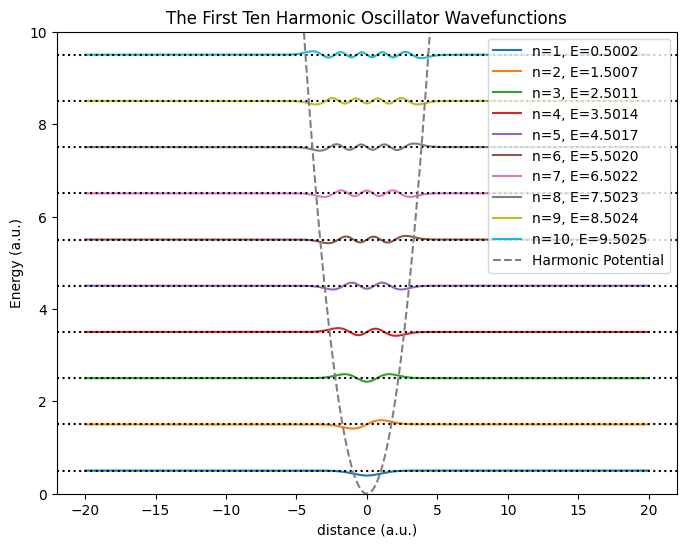

In [26]:
# Plot the first ten wavefunctions for harmonic potential

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(x, (Eigenfunctions_harmonic_sorted[:, i] + Eigenvalues_harmonic_sorted[i]), label=f"n={i+1}, E={Eigenvalues_harmonic_sorted[i]:.4f}") # Show the wavefunctions at their corresponding energy level.
    plt.axhline(Eigenvalues_harmonic_sorted[i], color = "black", linestyle = "dotted" )
    
plt.plot(x, harmonic_potential(x, omega), linestyle = "--", color = "grey", label = "Harmonic Potential")
plt.ylim(0, 10)
plt.xlabel("distance (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.title('The First Ten Harmonic Oscillator Wavefunctions')
plt.legend()
plt.show()

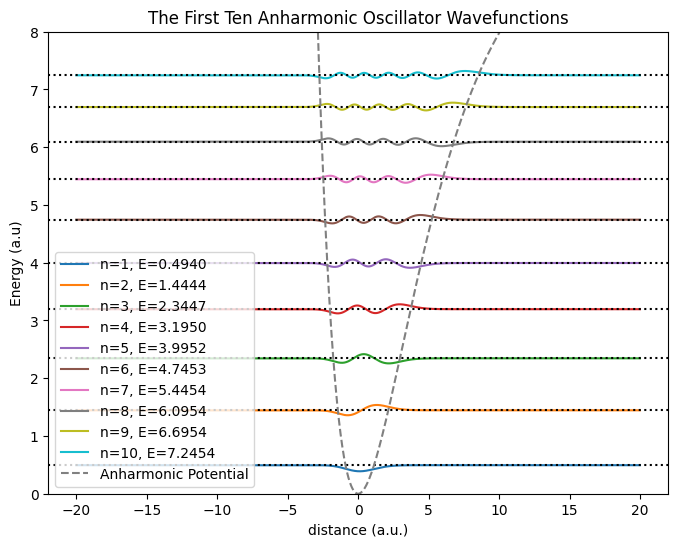

In [38]:
# Plot the first ten wavefunctions for anharmonic potential
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(x, Eigenfunctions_anharmonic_sorted[:, i] + Eigenvalues_anharmonic_sorted[i], label=f"n={i+1}, E={Eigenvalues_anharmonic_sorted[i]:.4f}")
    plt.axhline(Eigenvalues_anharmonic_sorted[i], color = "black", linestyle = "dotted" ) # Plot the energy level.

plt.plot(x, anharmonic_potential(x, D, beta, x0), linestyle = "--", color = "grey", label = "Anharmonic Potential") # Plot the potential.
plt.ylim(0, 8) # Set a limit on y axis to see all the wavefunctions clearly
plt.xlabel("distance (a.u.)")
plt.ylabel("Energy (a.u)")
plt.title('The First Ten Anharmonic Oscillator Wavefunctions')
plt.legend()
plt.show()